In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/ofrifox/Downloads/XY_train.csv'

data = pd.read_csv(path)


# data.head()


def plot_cities(df, ax):
    cities_count = df['city'].value_counts()
    cities_count.hist(ax=ax).set_title('cities')


def plot_cities_development(df, ax):
    df.groupby('city')['city_development_index'].mean().plot.density(ax=ax, title='city_development_index')



def plot_gender(df, ax):
    df['gender'].value_counts(dropna=False).plot.pie(ax=ax, title='gender')


def plot_relevant_experience(df, ax):
    sns.countplot(x='relevent_experience', hue='target',ax=ax, data=data, palette="Set1").set_title('relevant experience by target') 


def plot_education_level(df, ax):
    df['education_level'].value_counts().plot(kind='bar', ax=ax, title='education_level')


def plot_company_type(df, ax):
    df['company_type'].value_counts(dropna=False).plot(kind='bar', ax=ax, title='company_type')


def plot_training_hours(df, ax):
    sns.kdeplot(df['training_hours'], ax=ax).set_title('training_hours')


def plot_target(df, ax):
    df['target'].value_counts().plot.bar(ax=ax).set_title('target')


def get_all_plots(df):
    plot_lst = [
        plot_cities, plot_cities_development, plot_gender,
        plot_relevant_experience, plot_education_level,
        plot_company_type,
        plot_training_hours, plot_target
    ]

    fig, axes = plt.subplots(2, int(len(plot_lst) / 2), figsize=(15, 15))

    axe = axes.ravel()

    for i in range(len(plot_lst)):
        plot_lst[i](df, ax=axe[i])

    axe[3].set_visible(False)


def get_statistical_description(df):
    statistical_description = df.describe().transpose()
    statistical_description['value_range'] = statistical_description['min'].astype(str) + ' - ' + statistical_description['max'].astype(str)
    statistical_description = statistical_description.drop(columns=['count', 'min', 'max', '25%', '75%'])
    return statistical_description


def get_job_seekers_by_gender(df):
    print('אחוז מחפשי העבודה לפי מגדר')
    return df[df['target'] == 0]['gender'].value_counts() / df['gender'].value_counts()


# get_all_plots(data)



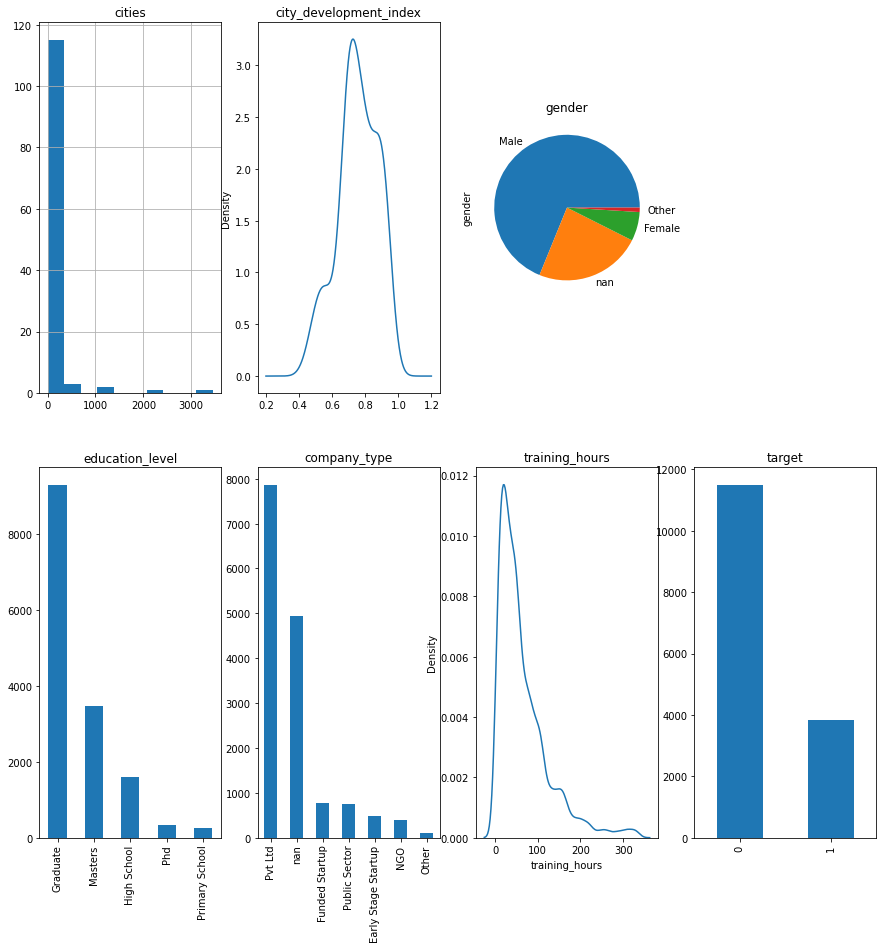

In [13]:
get_all_plots(data)


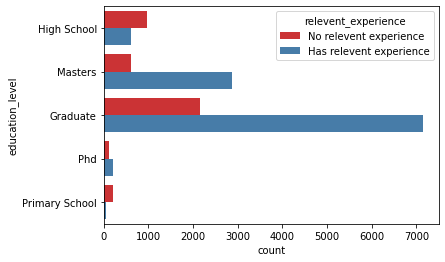

In [14]:
sns.countplot(hue='relevent_experience', y='education_level', data=data, palette="Set1")
plt.show()

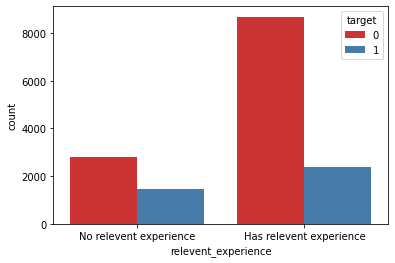

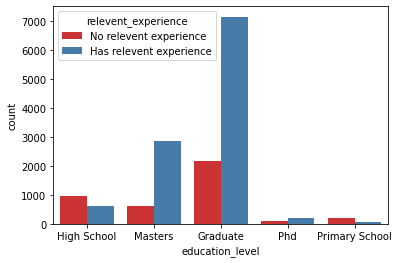

In [15]:
sns.countplot(x='relevent_experience', hue='target', data=data, palette="Set1")
plt.show()

sns.countplot(x='education_level', hue='relevent_experience', data=data, palette="Set1")
plt.show()

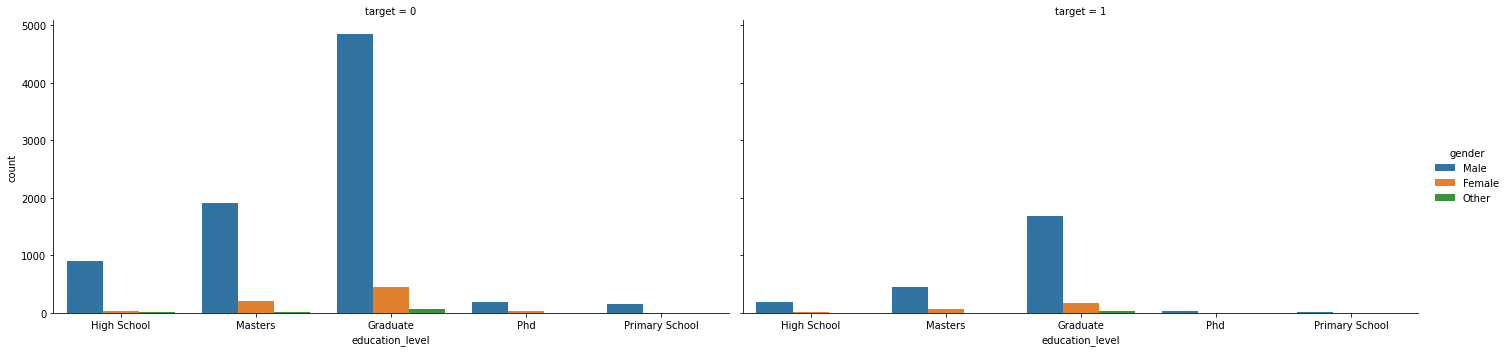

In [16]:
 sns.catplot(x="education_level", hue="gender", col="target", data=data, kind="count",  height=5, aspect=2)

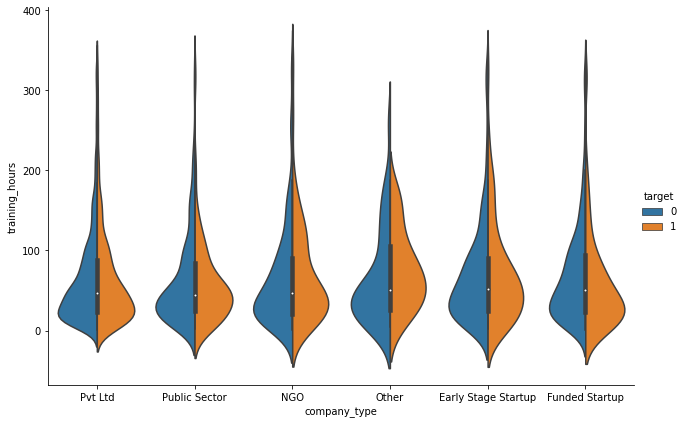

In [17]:
sns.catplot(x="company_type", y="training_hours", hue="target", kind="violin", split=True, data=data, height=6, aspect=1.5)

<AxesSubplot:>

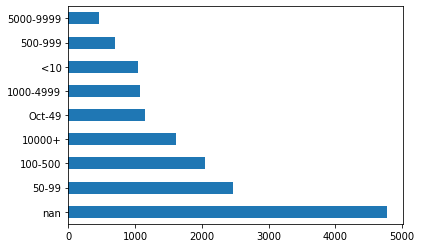

In [18]:
data["company_size"].value_counts(dropna=False).plot(kind='barh')

In [19]:
data["city_development_index"]

0        0.910
1        0.897
2        0.910
3        0.910
4        0.555
         ...  
15321    0.920
15322    0.866
15323    0.893
15324    0.624
15325    0.866
Name: city_development_index, Length: 15326, dtype: float64

In [20]:
#sns.catplot(x="training_hours", y="city_development_index", hue="target", kind="violin", split=True, data=data, height=6, aspect=1.5)

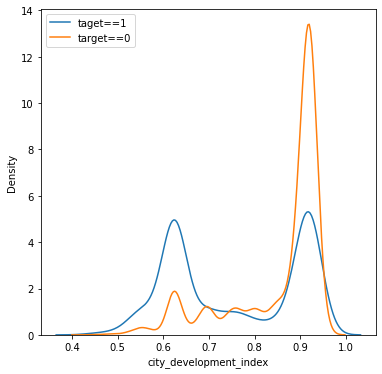

In [21]:
fig  = plt.figure(figsize=(6,6))
#plt.xscale("log")

sns.kdeplot(data["city_development_index"][data["target"]==1], label = 'taget==1')
sns.kdeplot(data["city_development_index"][data["target"]==0], label= 'target==0')
plt.legend()

In [22]:
from missing_values import *
# data = replace_by_dict(data, 'experience')
fig, axes  = plt.subplots(2)
sns.histplot(data['experience'][data["target"]==1], ax=axes[0])
sns.histplot(data['experience'][data["target"]==0], ax=axes[1])

ModuleNotFoundError: No module named 'missing_values'

In [ ]:
sns.catplot(x='experience', y="city_development_index", hue="target", kind="violin", split=True, data=data, height=6, aspect=1.5)

In [ ]:


sns.catplot(x="education_level", y='experience', hue="target", kind="violin", split=True, data=data, height=6, aspect=1.5)

In [ ]:
sns.catplot(x="relevent_experience", y="experience", hue="target", kind="violin", split=True, data=data, height=6, aspect=1.5)

In [ ]:
from missing_values import *
data= replace_by_dict(data,"experience")

def expiriance_withe_relevent_exp(df):
    if df["relevent_experience"]=='No relevent experience':
        return 0
    else:
        return df["experience"]

data["expereance with relevent experience "]=data.apply(expiriance_withe_relevent_exp,axis =1)


sns.kdeplot(data["expereance with relevent experience "][data['target']==1], label='target=1', color='red')
sns.kdeplot(data["expereance with relevent experience "][data['target']==0], label='target=0')
plt.legend()

In [ ]:
fig, axes  = plt.subplots(2)
sns.set(rc={'figure.figsize':(15,15)})

#sns.histplot(data['experience'][data["target"]==1], ax=axes[0])
#sns.histplot(data['experience'][data["target"]==0], ax=axes[1])
sns.kdeplot(x=data['education_level'][data["target"]==1],  data=data, palette="Set1",ax=axes[0]).set_title('target=1')
sns.kdeplot(x=data['education_level'][data["target"]==0], data=data, palette="Set1", ax=axes[1]).set_title('target=0')


In [ ]:


x,y = data['experience'][data["target"]==1], 'education_level'

df1 = data.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y=df1['percent'],hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [ ]:
df1

In [ ]:
## להפוך את 55 לאחוזים 

fig, axes  = plt.subplots(2)
sns.set(rc={'figure.figsize':(15,15)})

sns.countplot(x=data['experience'][data["target"]==1], hue='education_level', data=data, palette="Set1",ax=axes[0],estimator=lambda x: len(x) / len(data) * 100).set_title('target=1')
sns.countplot(x=data['experience'][data["target"]==0], hue='education_level', data=data, palette="Set1", ax=axes[1],estimator=lambda x: len(x) / len(data) * 100).set_title('target=0')


In [ ]:
plt.xscale("log")

sns.kdeplot(data['training_hours']).set_title('training_hours')

plt.xscale("log")

sns.kdeplot(data['training_hours']).set_title('training_hours')


In [ ]:
sns.heatmap(data.drop('target', 1).corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data.corr()


Text(0.5, 1.0, 'relevant experience by target')

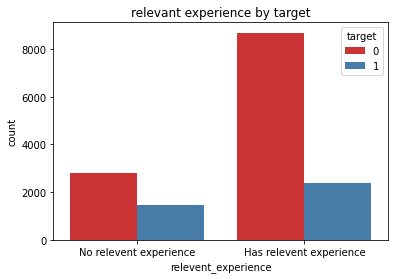

In [31]:


    sns.countplot(x='relevent_experience', hue='target', data=data, palette="Set1", ax=ax).set_title('relevant experience by target') 



In [32]:
 relevant_experience = data['relevent_experience'].value_counts()
    relevant_experience.index = relevant_experience.index.map({'Has relevent experience	': 'Has', 'No relevent experience': 'Doesnt have'})
    relevant_experience.plot(kind='bar', title='relevant_experience')

IndentationError: unexpected indent (Temp/ipykernel_29928/1808044426.py, line 2)